In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

The dataset has already been cleaned and verified. Starting from EDA step.

In [5]:
products = pd.read_csv('../online-shop-2024/products.csv')
order_items = pd.read_csv('../online-shop-2024/order_items.csv')
payments = pd.read_csv('../online-shop-2024/payment.csv')
orders = pd.read_csv('../online-shop-2024/orders.csv')
customers = pd.read_csv('../online-shop-2024/customers.csv')
suppliers = pd.read_csv('../online-shop-2024/suppliers.csv')

Merge data for easier understanding

In [10]:
orders['order_date'] = pd.to_datetime(orders['order_date'])

In [11]:
product_details = order_items.merge(products, on='product_id', how='left')
product_details

,order_item_id,order_id,product_id,quantity,price_at_purchase,product_name,category,price,supplier_id
0,1,6550,1032,1,342.92,Storage Shelf,Furniture,680.43,532
1,2,7324,1695,1,955.86,Desk Lamp,Home & Kitchen,940.82,595
2,3,11952,1962,1,909.45,Rice Cooker,Home & Kitchen,542.94,562
3,4,8938,1958,1,984.91,External SSD,Electronics,180.06,558
4,5,4238,1880,1,649.18,Kitchen Blender,Home & Kitchen,856.78,580
...,...,...,...,...,...,...,...,...,...
19995,19996,7783,1871,4,33.18,Power Strip,Electronics,181.38,571
19996,19997,5174,1738,4,33.18,Wireless Charger,Electronics,18.98,538
19997,19998,8437,1796,4,33.19,4K Monitor,Electronics,696.05,596
19998,19999,2698,867,4,33.20,Food Processor,Home & Kitchen,905.75,567


Finally merging the 3 tables: order_items, products and orders to understand the full details of each item sold within each individual order.
New columns were created which tracks each items total value sold per order as well as the items total value purchased from the supplier. This can help calculate the business's total net profit and losses.

In [12]:
#merging on left since all orders have their unique order_id
product_details_orders = orders.merge(product_details, on='order_id', how='left')
product_details_orders['order_value']=(product_details_orders['quantity']*product_details_orders['price'])

#creating new columns to track the value of items being sold as well as the price the items were being sold at in total
product_details_orders['item_order_total_value'] = (product_details_orders['quantity']*product_details_orders['price_at_purchase'])
product_details_orders['item_order_total_price'] = (product_details_orders['quantity']*product_details_orders['price'])

In [13]:
product_details_orders

,order_id,order_date,customer_id,total_price,order_item_id,product_id,quantity,price_at_purchase,product_name,category,price,supplier_id,order_value,item_order_total_value,item_order_total_price
0,7324,2023-11-27,2160,955.86,2,1695,1,955.86,Desk Lamp,Home & Kitchen,940.82,595,940.82,955.86,940.82
1,8938,2024-08-31,8497,984.91,4,1958,1,984.91,External SSD,Electronics,180.06,558,180.06,984.91,180.06
2,4238,2023-12-05,6295,649.18,5,1880,1,649.18,Kitchen Blender,Home & Kitchen,856.78,580,856.78,649.18,856.78
3,10944,2024-02-22,2936,54.83,7,1,1,54.83,Office Chair,Furniture,445.01,501,445.01,54.83,445.01
4,11075,2024-08-14,2994,320.24,8,827,1,320.24,Smart Watch,Electronics,764.34,527,764.34,320.24,764.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,801,2024-06-26,7660,288.47,171,1092,1,288.47,Electric Kettle,Home & Kitchen,359.63,592,359.63,288.47,359.63
19996,12362,2024-01-19,4932,596.00,1624,1111,2,298.00,Gaming Mouse Pad,Accessories,295.47,511,590.94,596.00,590.94
19997,8144,2024-01-02,3242,1956.12,2175,1039,2,978.06,Wireless Presenter,Electronics,85.61,539,171.22,1956.12,171.22
19998,3329,2024-03-07,5908,2173.20,3135,1954,3,724.40,Desk Mat,Accessories,438.57,554,1315.71,2173.20,1315.71


Track monthly sales
Analysing ket metrics such as total revenue, total amount of orders, items sold and average order value

In [14]:
#creating new dataframe to store all key metrics
monthly_summary = product_details_orders.groupby(product_details_orders['order_date'].dt.to_period('M').rename('purchase_month')).agg(
    total_revenue=('item_order_total_value','sum'),
    total_value=('order_value','sum'),
    total_orders=('order_id','count'),
    total_items_sold=('quantity','count'),
    average_order_value=('item_order_total_value', lambda x: round(x.mean(),2))
).reset_index()

#creating new column to store revenue to value ratio of each month
monthly_summary['revenue_to_value_ratio'] = (monthly_summary['total_revenue']/monthly_summary['total_value'])

In [15]:
monthly_summary

,purchase_month,total_revenue,total_value,total_orders,total_items_sold,average_order_value,revenue_to_value_ratio
0,2023-11,2763201.95,3025134.76,1338,1338,2065.17,0.913414
1,2023-12,3360869.91,3761586.01,1631,1631,2060.62,0.893472
2,2024-01,3667447.62,4103458.83,1702,1702,2154.79,0.893745
3,2024-02,3300225.42,3633181.48,1599,1599,2063.93,0.908357
4,2024-03,3756172.48,4155895.85,1743,1743,2155.00,0.903818
5,2024-04,3493861.41,3763084.18,1601,1601,2182.30,0.928457
6,2024-05,3590164.64,4013730.24,1672,1672,2147.23,0.894471
7,2024-06,3355548.13,3650831.41,1595,1595,2103.79,0.919119
8,2024-07,3760470.93,4296804.55,1757,1757,2140.28,0.875178
9,2024-08,3737818.32,4124085.02,1739,1739,2149.41,0.906339


Visualising the monthly revenue compared to value of items being sold to illustrate the amount loss occuring each month

/tmp/ipykernel_36/4084207526.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_labels)


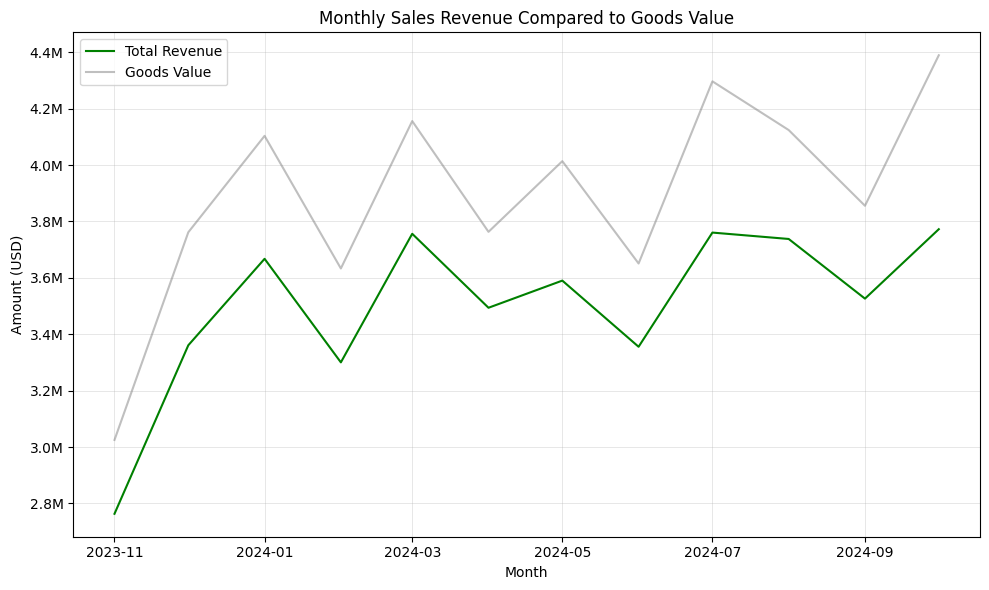

In [16]:
#removing the last month due to incomplete data
filtered_df = monthly_summary[monthly_summary['purchase_month'] <= '2024-10']

fig, ax = plt.subplots(figsize=(10, 6))

#preparing data for plotting
plt.plot(filtered_df['purchase_month'].dt.to_timestamp(), filtered_df['total_revenue'], label='Total Revenue', color='green')
plt.plot(filtered_df['purchase_month'].dt.to_timestamp(), filtered_df['total_value'], label='Goods Value', color='gray', alpha=0.5)

#adjusting the y axis
yticks = ax.get_yticks()
new_labels = [f"{y/1e6:.1f}M" for y in yticks]
ax.set_yticklabels(new_labels)


#plot line graph
ax.set_title('Monthly Sales Revenue Compared to Goods Value')
ax.set_xlabel('Month')
ax.set_ylabel('Amount (USD)')
ax.legend()
plt.grid(True, alpha=0.3, linewidth=0.7)
plt.tight_layout()
#plt.savefig("Monthly_Sales_Revenue_Compared_to Goods_Value.png", dpi=300, bbox_inches='tight')
plt.show()

Track monthly growth rates

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


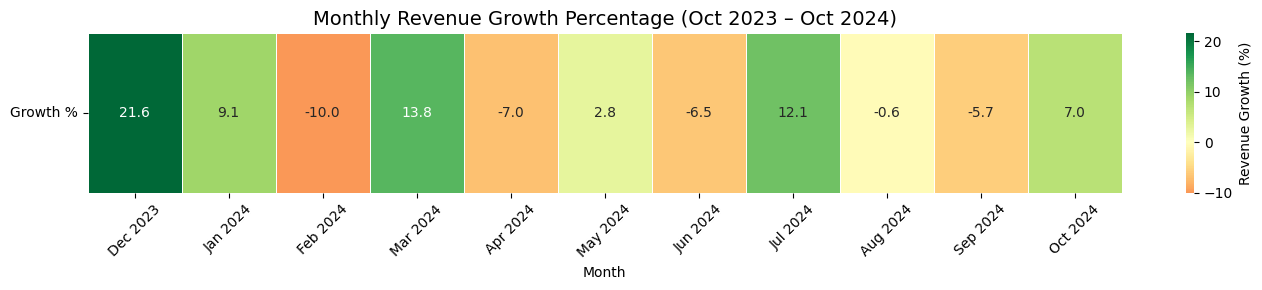

In [17]:
filtered_df = monthly_summary[monthly_summary['purchase_month'] <= '2024-10'].copy()
filtered_df['purchase_month'] = filtered_df['purchase_month'].dt.to_timestamp()

#calculate revenue growth percentage
filtered_df['revenue_growth_pct'] = filtered_df['total_revenue'].pct_change() * 100
filtered_df['revenue_growth_pct'] = filtered_df['revenue_growth_pct'].round(1)

#drop the first row (no previous month to compare to)
filtered_df = filtered_df.iloc[1:]

#Prepare data for heatmap
heatmap_data = pd.DataFrame({
    'Month': filtered_df['purchase_month'].dt.strftime('%b %Y'),
    'Growth %': filtered_df['revenue_growth_pct']
}).set_index('Month').T  # transpose to make months columns

#plot heatmap
plt.figure(figsize=(14, 3))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='RdYlGn',
    linewidths=0.5,
    cbar_kws={'label': 'Revenue Growth (%)'},
    center=0
)

plt.title('Monthly Revenue Growth Percentage (Oct 2023 – Oct 2024)', fontsize=14)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("monthly_revenue_growth.png", dpi=300, bbox_inches='tight')
plt.show()

Find the specific number of items sold at a profit and loss

In [18]:
sold_above_price = product_details_orders[product_details_orders['price_at_purchase'] > product_details_orders['price']]
sold_below_price = product_details_orders[product_details_orders['price_at_purchase'] < product_details_orders['price']]
print(f"number of products sold below goods value: {sold_below_price['order_id'].count()}")
print(f"number of products sold above goods value: {sold_above_price['order_id'].count()}")

number of products sold below goods value: 12366
number of products sold above goods value: 7634


**Find best performing products and margins**

Find volume and overall percentage of volume by category

In [19]:
#creating new dataframe to store the volume of sales
category_volume = product_details.groupby('category')['quantity'].sum().reset_index()
total_quantity = category_volume['quantity'].sum()

#track its percentage contribution
category_volume['quantity_pct'] = (category_volume['quantity']/total_quantity)
category_volume

,category,quantity,quantity_pct
0,Accessories,21763,0.231830
1,Electronics,33704,0.359031
2,Furniture,13609,0.144969
3,Home & Kitchen,24799,0.264170


Find sales and overall percentage of sales by category

In [23]:
#creating new dataframe to store the total sales
total_categorical_sales = product_details_orders.groupby('category')['item_order_total_value'].sum().reset_index()
total_categorical_sales.rename(columns={"item_order_total_value": "total_sales"}, inplace=True)
total_sales = total_categorical_sales['total_sales'].sum()

#track its percentage contribution
total_categorical_sales['sales_pct'] = (total_categorical_sales['total_sales']/total_sales)
total_categorical_sales

,category,total_sales,sales_pct
0,Accessories,9833968.69,0.231411
1,Electronics,15247167.14,0.358793
2,Furniture,6231783.08,0.146645
3,Home & Kitchen,11182785.90,0.263151


Visualising the monthly categorical sales

In [21]:
monthly_category_sales = product_details_orders.groupby(['category', product_details_orders['order_date'].dt.to_period('M')])['item_order_total_value'].sum().reset_index()
monthly_category_sales.rename(columns={"item_order_total_value": "total_sales"}, inplace=True)
monthly_category_sales.head()

,category,order_date,total_sales
0,Accessories,2023-11,619443.33
1,Accessories,2023-12,766899.99
2,Accessories,2024-01,829533.23
3,Accessories,2024-02,805772.26
4,Accessories,2024-03,929401.38


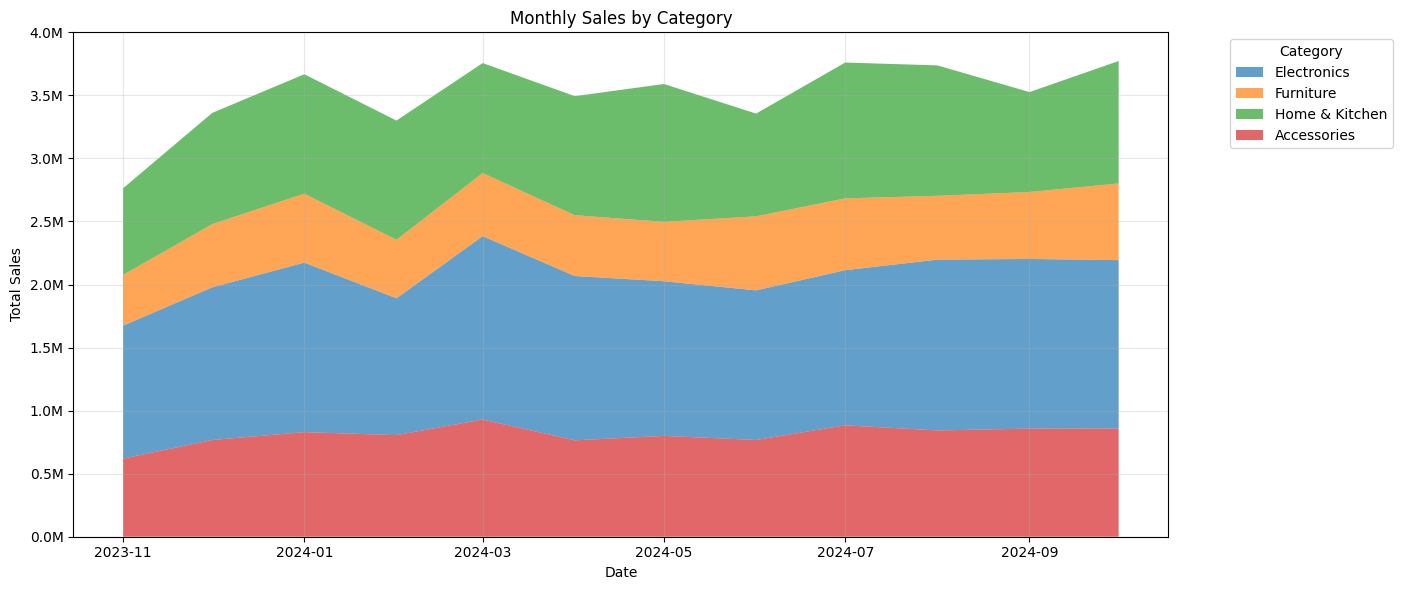

In [43]:
#filer last month due to incomplete data
monthly_category_sales = monthly_category_sales[monthly_category_sales['order_date'] <= '2024-10']

#prepare and make sure data is ready for plotting
monthly_category_sales = monthly_category_sales.sort_values(['order_date', 'category'])

#plot data
fig, ax = plt.subplots(figsize=(14, 6))

# Extract unique product categories
categories = monthly_category_sales['category'].unique()
stack = None

# Loop through each category to build the stacked area chart
for category in categories:
    data = monthly_category_sales[monthly_category_sales['category'] == category]
    if stack is None:
        stack = data.set_index('order_date')['total_sales']
    else:
        # Stack on top of the previous area
        new_stack = data.set_index('order_date')['total_sales']
        ax.fill_between(
            new_stack.index,
            stack,
            stack + new_stack,
            label=category,
            alpha=0.7
        )
        # Update the stack for the next category
        stack += new_stack

# Initial base layer
first_cat = categories[0]
first_data = monthly_category_sales[monthly_category_sales['category'] == first_cat]
ax.fill_between(
    first_data['order_date'],
    0,
    first_data['total_sales'],
    label=first_cat,
    alpha=0.7
)

# plotting final details
plt.title('Monthly Sales by Category')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

ax.set_ylim(bottom=0)
yticks = ax.get_yticks()
ax.set_yticks(yticks)
new_labels = [f"{y/1e6:.1f}M" for y in yticks]
ax.set_yticklabels(new_labels)
#plt.savefig("monthly_categorical_sales", dpi=300, bbox_inches='tight')
plt.show()

Track specific item quantity sales trends

<Axes: >

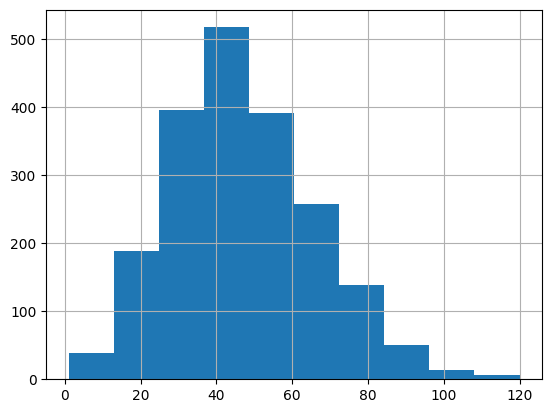

In [24]:
#create new dataframe to track product and supplier sales
product_volume = product_details.groupby('product_id').agg(
    quantity=('quantity', 'sum'),
    supplier_id=('supplier_id', 'first')
    ).reset_index()

#quick plot to see distribution
product_volume['quantity'].hist()

In [25]:
product_volume

,product_id,quantity,supplier_id
0,1,2,501
1,2,33,502
2,3,52,503
3,4,78,504
4,5,38,505
...,...,...,...
1992,1996,82,596
1993,1997,65,597
1994,1998,87,598
1995,1999,43,599


In [47]:
product_volume = product_volume.sort_values(by='quantity', ascending=False)

#track the highest sellers and cumulative sales to find top percentile sellers
product_volume['cumulative_qty'] = product_volume['quantity'].cumsum()
total_qty = product_volume['quantity'].sum()
product_volume['cumulative_pct'] = product_volume['cumulative_qty'] / total_qty

45.0

Visualising the distribution of each items number of sales. Investigating whether a large proportion of sales are coming from a minority of products like the 80-20 rule, or if its evenly spread. 

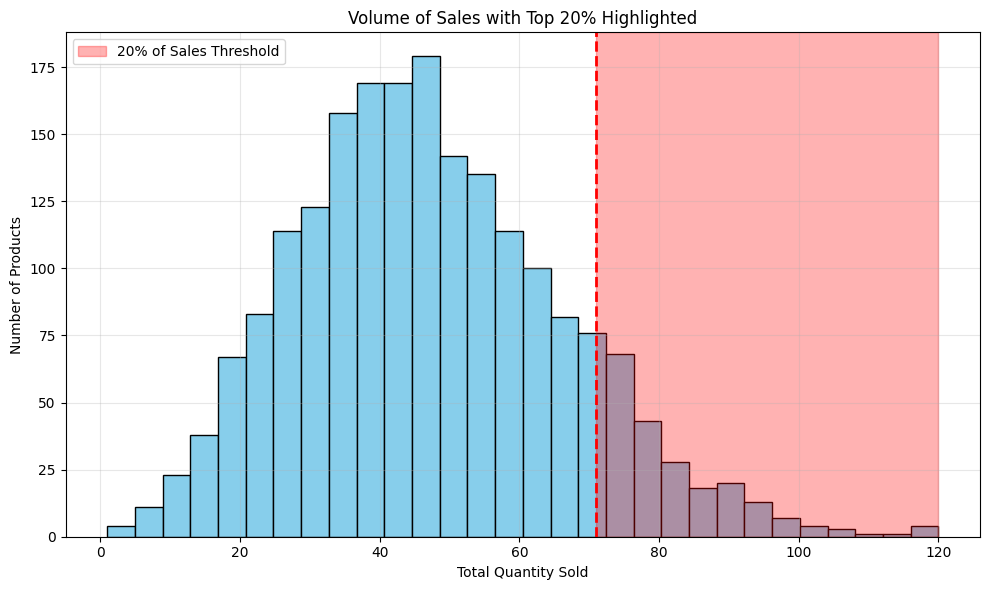

In [44]:
cutoff_quantity = product_volume[product_volume['cumulative_pct'] >= 0.2].iloc[0]['quantity']

#Plot the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(product_volume['quantity'], bins=30, color='skyblue', edgecolor='black')

#Shade the right-hand region for top 20%
plt.axvspan(cutoff_quantity, product_volume['quantity'].max(), color='red', alpha=0.3, label='20% of Sales Threshold')

#Add labels and formatting
plt.axvline(cutoff_quantity, color='red', linestyle='--', linewidth=2)
plt.title('Volume of Sales with Top 20% Highlighted')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Number of Products')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
#plt.savefig("Distribution of Sales", dpi=300, bbox_inches='tight')
plt.show()

Find how many products produce 20% of total orders

In [58]:
x=product_volume[product_volume['cumulative_pct'] <= 0.2]['product_id'].count()
x

228

Explore the sales/revenue of each product. The profit/loss of each product is specifically tracked to find the loss and profit leaders.

In [65]:
#create new dataframe to store the revenue and profit by product
product_profits = product_sales = product_details_orders.groupby('product_id').agg(
    sales=('item_order_total_value', 'sum'),
    value=('item_order_total_price', 'sum')
    ).reset_index()

#calculate the net profit and loss
product_profits['profit'] = (product_profits['sales']-product_profits['value'])
#sort to find the most and least profitable products
product_profits_sorted = product_profits.sort_values(by='profit')
product_profits_sorted

,product_id,sales,value,profit
319,321,24919.37,85857.69,-60938.32
79,80,33094.25,91612.36,-58518.11
1593,1595,34611.41,88706.30,-54094.89
741,743,39291.89,92113.92,-52822.03
758,760,14595.72,65127.72,-50532.00
...,...,...,...,...
1312,1314,46605.72,8422.96,38182.76
173,174,46509.70,7901.40,38608.30
1179,1181,57196.17,14855.88,42340.29
1280,1282,52237.86,7887.46,44350.40


Visualising the distribution of the catalouge's profit margin per product. Larger bins of a histogram were used to help illustrate the normal distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


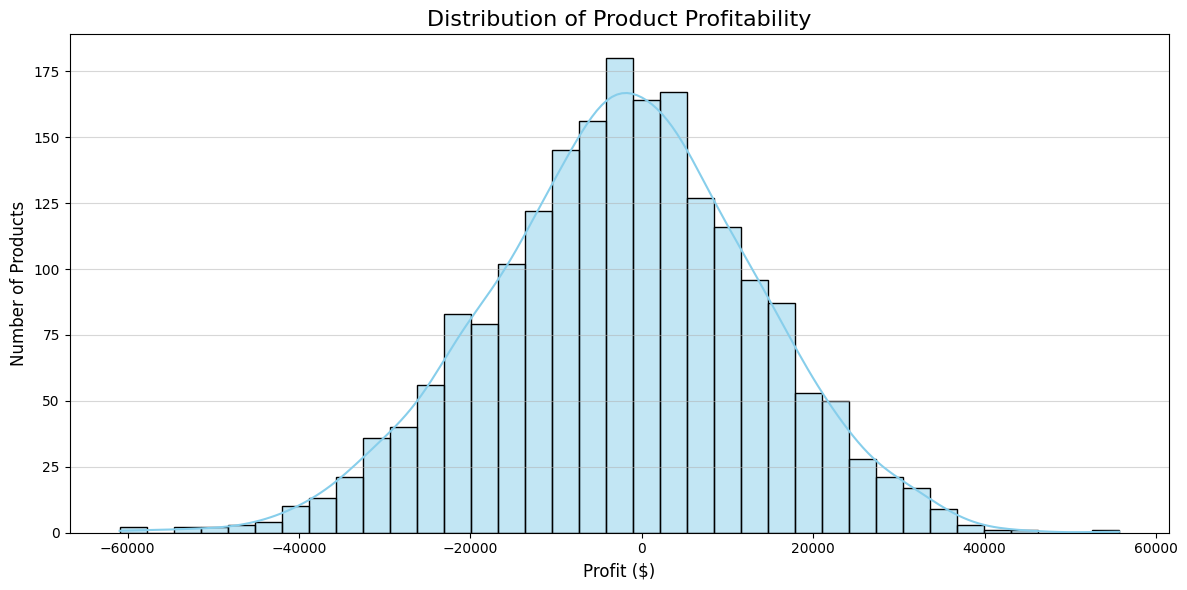

In [72]:
plt.figure(figsize=(12, 6))
sns.histplot(product_profits_sorted['profit'], kde=True, color='skyblue')

#plot histogram
plt.title('Distribution of Product Profitability', fontsize=16)
plt.xlabel('Profit ($)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
#plt.savefig("product_profitability", dpi=300, bbox_inches='tight')
plt.show()

Finding how much was lost by the top 20% of most sold items

In [55]:
highest_sellers = product_volume[product_volume['cumulative_pct'] >= 0.2]
highest_sellers = highest_sellers.merge(product_profits, on='product_id', how='left')
#sum the total losses of the top 20% sellers
highest_sellers['profit'].sum()

-3719297.66

Tracking sales of each product with their respective supplier_id

In [29]:
product_sales = product_details_orders.groupby('product_id').agg(
    sales=('item_order_total_value', 'sum'),
    supplier_id=('supplier_id', 'first')
    ).reset_index()

In [30]:
product_sales = product_sales.sort_values(by='sales', ascending=False)
product_sales['cumulative_sales'] = product_sales['sales'].cumsum()
total_sales = product_sales['sales'].sum()
product_sales['cumulative_sales'] = product_sales['cumulative_sales'] / total_sales

Find relevant sellers that are in the top percentile

In [31]:
product_sales

,product_id,sales,supplier_id,cumulative_sales
695,697,63822.93,597,0.001502
1184,1186,61073.42,586,0.002939
1010,1012,59233.99,512,0.004333
1179,1181,57196.17,581,0.005679
1840,1844,56872.60,544,0.007017
...,...,...,...,...
1302,1304,1043.52,504,0.999934
1021,1023,1021.47,523,0.999958
28,29,991.71,529,0.999981
958,960,517.12,560,0.999993


Find Which Suppliers Provide The Most Sold Items by category and Items that make the most revenue and also the average difference between, price and revenue by each supplier



In [32]:
suppliers_by_volume = product_volume.groupby('supplier_id')['quantity'].sum().reset_index()
suppliers_by_volume['quantity_pct']=(suppliers_by_volume['quantity']/total_qty)
suppliers_by_volume.sort_values(by='quantity', ascending=False, inplace=True)

In [33]:
suppliers_by_volume

,supplier_id,quantity,quantity_pct
36,537,1150,0.012250
95,596,1145,0.012197
45,546,1135,0.012091
49,550,1107,0.011792
96,597,1107,0.011792
...,...,...,...
34,535,803,0.008554
92,593,794,0.008458
82,583,773,0.008234
40,541,767,0.008170


Splitting the dataset into products sold at a loss and profit

In [34]:
sold_above_price_supplier = sold_above_price.groupby('supplier_id').agg(
    goods_value = ('item_order_total_price', 'sum'),
    goods_revenue = ('item_order_total_value', 'sum')
).reset_index()

sold_above_price_supplier = sold_above_price_supplier.merge(suppliers_by_volume.drop('quantity_pct', axis=1), on ='supplier_id', how='left')

sold_above_price_supplier['return_on_sales'] = (sold_above_price_supplier['goods_revenue']-sold_above_price_supplier['goods_value'])
sold_above_price_supplier['return_on_sales_per_item'] = (sold_above_price_supplier['return_on_sales']/sold_above_price_supplier['quantity'])
sold_above_price_supplier.sort_values(by='return_on_sales_per_item', ascending=False, inplace=True)
sold_above_price_supplier

,supplier_id,goods_value,goods_revenue,quantity,return_on_sales,return_on_sales_per_item
39,540,130331.16,359528.14,989,229196.98,231.746188
29,530,144318.26,362231.97,943,217913.71,231.085589
92,593,109776.42,277635.46,794,167859.04,211.409370
40,541,110504.08,267282.61,767,156778.53,204.404863
50,551,181501.39,384258.20,1000,202756.81,202.756810
...,...,...,...,...,...,...
34,535,126769.67,200299.56,803,73529.89,91.568979
89,590,126689.03,201639.37,826,74950.34,90.738910
25,526,148508.97,238543.39,1033,90034.42,87.158199
93,594,97414.21,153910.05,835,56495.84,67.659689


In [35]:
sold_below_price_supplier = sold_below_price.groupby('supplier_id').agg(
    goods_value = ('item_order_total_price', 'sum'),
    goods_revenue = ('item_order_total_value', 'sum')
).reset_index()

sold_below_price_supplier = sold_below_price_supplier.merge(suppliers_by_volume.drop('quantity_pct', axis=1), on ='supplier_id', how='left')

sold_below_price_supplier['return_on_sales'] = (sold_below_price_supplier['goods_revenue']-sold_below_price_supplier['goods_value'])
sold_below_price_supplier['return_on_sales_per_item'] = (sold_below_price_supplier['return_on_sales']/sold_below_price_supplier['quantity'])
sold_below_price_supplier.sort_values(by='return_on_sales_per_item', ascending=True, inplace=True)
sold_below_price_supplier

,supplier_id,goods_value,goods_revenue,quantity,return_on_sales,return_on_sales_per_item
55,556,543215.91,255359.47,957,-287856.44,-300.790428
93,594,422508.79,177283.58,835,-245225.21,-293.682886
61,562,434418.73,191899.26,890,-242519.47,-272.493787
89,590,412773.99,191102.71,826,-221671.28,-268.367167
77,578,362645.18,141135.90,833,-221509.28,-265.917503
...,...,...,...,...,...,...
0,501,217169.70,84962.75,944,-132206.95,-140.049735
50,551,223664.47,87035.65,1000,-136628.82,-136.628820
49,550,278598.32,128537.13,1107,-150061.19,-135.556631
75,576,207738.32,91100.09,917,-116638.23,-127.195453


Finally combining to see the overall performance by supplier_id

In [73]:
combined = pd.concat([
    sold_above_price_supplier[['supplier_id', 'return_on_sales', 'quantity']],
    sold_below_price_supplier[['supplier_id', 'return_on_sales', 'quantity']]
])

# Group by supplier_id to get total profit and total volume
supplier_summary = combined.groupby('supplier_id').agg(
    total_profit=('return_on_sales', 'sum'),
    total_quantity=('quantity', 'sum')
).reset_index()

In [75]:
supplier_summary.sort_values(by='total_profit', inplace=True)
supplier_summary

,supplier_id,total_profit,total_quantity
55,556,-198442.48,1914
93,594,-188729.37,1670
25,526,-182957.92,2066
33,534,-160107.14,2088
47,548,-158463.31,1652
...,...,...,...
38,539,47891.95,1782
64,565,62293.62,1772
50,551,66127.99,2000
29,530,82769.23,1886
